In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("diabetes_prediction_dataset.csv",usecols=["gender","age","hypertension","heart_disease","smoking_history","blood_glucose_level","diabetes"])

In [20]:
X=df.drop("diabetes",axis=1)
y=df["diabetes"]

In [21]:
df

,gender,age,hypertension,heart_disease,smoking_history,blood_glucose_level,diabetes
0,0,80,0,1,4,0.047704,0
1,0,54,0,0,0,-1.426210,0
2,1,28,0,0,4,0.489878,0
3,0,36,0,0,1,0.416183,0
4,1,76,1,1,1,0.416183,0
...,...,...,...,...,...,...,...
99995,0,80,0,0,0,-1.180558,0
99996,0,2,0,0,0,-0.934905,0
99997,1,66,0,0,3,0.416183,0
99998,0,24,0,0,4,-0.934905,0


In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["gender"]=le.fit_transform(df["gender"])
df["smoking_history"]=le.fit_transform(df["smoking_history"])


In [23]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df[["blood_glucose_level"]]=ss.fit_transform(df[["blood_glucose_level"]])

In [24]:
df["age"]=df["age"].astype(int)

<Axes: xlabel='gender'>

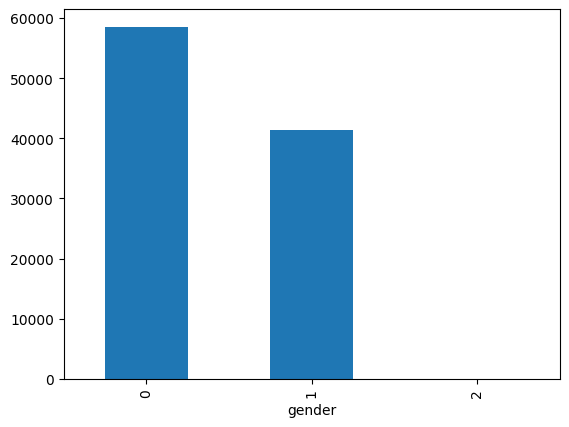

In [25]:
df["gender"].value_counts().plot(kind="bar")

In [26]:
from imblearn.over_sampling import RandomOverSampler
rs=RandomOverSampler()
X_resample,y_resample=rs.fit_resample(X,y)

<Axes: xlabel='diabetes'>

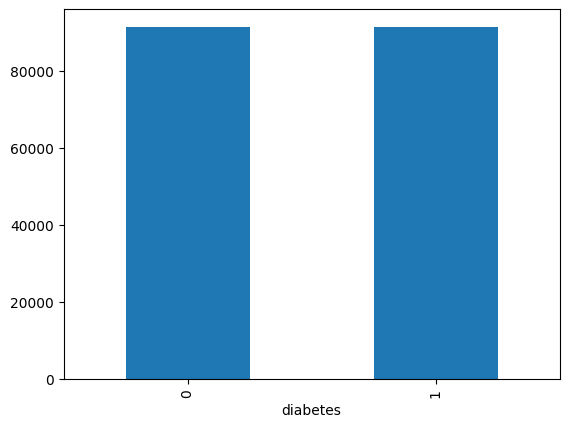

In [27]:
y_resample.value_counts().plot(kind="bar")

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_resample,y_resample,test_size=0.2,random_state=42)

<Axes: xlabel='diabetes'>

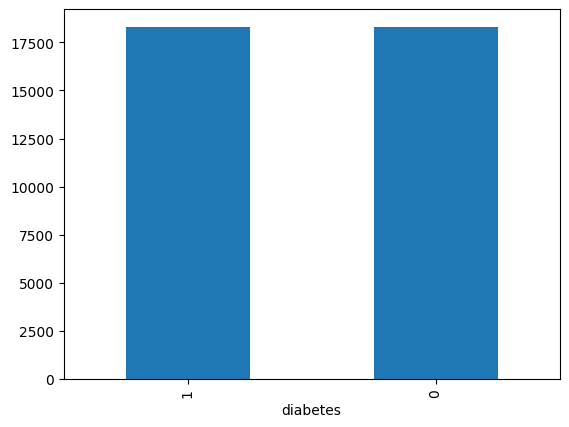

In [29]:
y_test.value_counts().plot(kind="bar")


In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_predict=rf.predict(X_test)

In [31]:
y_predict

array([1, 0, 0, ..., 1, 1, 1])

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(f'Model Accuracy score: {accuracy_score(y_test,y_predict)}')
print(f'Model Confusion mertix: {confusion_matrix(y_test,y_predict)}')
print(f'Model classification_report: {classification_report(y_test,y_predict)}')


Model Accuracy score: 0.8906284153005465
Model Confusion mertix: [[15514  2779]
 [ 1224 17083]]
Model classification_report:               precision    recall  f1-score   support

           0       0.93      0.85      0.89     18293
           1       0.86      0.93      0.90     18307

    accuracy                           0.89     36600
   macro avg       0.89      0.89      0.89     36600
weighted avg       0.89      0.89      0.89     36600



In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

models = {
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    "SVC (RBF)": make_pipeline(StandardScaler(), LinearSVC(max_iter=5000, random_state=42)),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier()),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name}: {scores.mean():.4f}")


Logistic Regression: 0.7960
SVC (RBF): 0.7967
Random Forest: 0.8874
Gradient Boosting: 0.8367
KNN: 0.8643
Naive Bayes: 0.7642


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

voting_clf = VotingClassifier(
    estimators=[
        ("Random Forest", RandomForestClassifier(random_state=42)),
        ("KNN", make_pipeline(StandardScaler(), KNeighborsClassifier())),
        ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
        ("Logistic Regression", make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))),
        ("Naive Bayes", GaussianNB())
    ],
    voting="soft",  # use probabilities
    weights=[3, 2, 2, 1, 1]  # RF > KNN/GB > others
)

# Train ensemble
voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Voting Classifier Accuracy: 0.8786338797814207
              precision    recall  f1-score   support

           0       0.89      0.86      0.88     18293
           1       0.86      0.90      0.88     18307

    accuracy                           0.88     36600
   macro avg       0.88      0.88      0.88     36600
weighted avg       0.88      0.88      0.88     36600



In [35]:
def prediction(gender,age, hypertension, heart_disease, smoking_history,blood_glucose_level):
    data = {
    'gender': [gender],
    'age': [age],
    'hypertension': [hypertension],
    'heart_disease': [heart_disease],
    'smoking_history': [smoking_history],
    'blood_glucose_level': [blood_glucose_level]
    }
    # Create a DataFrame from the dictionary
    df = pd.DataFrame(data)


    # Encode the categorical columns
    categorical_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'blood_glucose_level']
    for column in categorical_columns:
        df[column] = le.fit_transform(df[column])
    # df = ss.fit_transform(df)

    result = rf.predict(df).reshape(1,-1)
    return result[0]

In [36]:
result=prediction(1,44,1,0,1,200)

In [37]:
if result==0:
    print("No")
else:
    print("Yes")

No


In [39]:
import pickle 
pickle.dump(voting_clf,open("DMD","wb"))